# PyTorch work flow

In [ ]:
what_we_are_covering = {1: 'Date (prebair and load)',
                        2: 'Build model',
                        3: 'Fitiing the model to data (traning)',
                        4: 'Making predections and evaluating model (inference)',
                        5: 'saving and loading a model',
                        6: 'Putting it all together'}

what_we_are_covering

{1: 'Date (prebair and load)',
 2: 'Build model',
 3: 'Fitiing the model to data (traning)',
 4: 'Making predections and evaluating model (inference)',
 5: 'saving and loading a model',
 6: 'Putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all the PyTorch bulding blocks for neural network
import matplotlib.pyplot as plt

# Check pytorch version
print(torch.__version__)

2.10.0+cpu


## 1.Data (preparing and loading)

### Linear regrission

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.



In [ ]:
# Create *Known* parameters

weight = 0.7
bias = 0.3

# Create the start and the end and the steps
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1) # Add 1 dimension
y = weight * x + bias

In [ ]:
len(x), len(y)

(50, 50)

### Spliting data into traning and test sets

Let's create a traning and test set with our data

In [ ]:
# Create a train/test split

train_split = int(0.8 * len(x)) # We used 0.8 because we want 80% train and 20% test (very common)
x_train, y_train = x[:train_split], y[:train_split] # x, y = take everything before the 40
x_test, y_test = x[train_split:], y[train_split:] # x, y = take everything after the 40

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

## How might we can get better data Visualize?

Visusalize, Visusalize, Visusalize

In [ ]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):

  '''
  Plots traning data, test data and compare predictions
  '''

  plt.figure(figsize=(10,7))

  # Plot traning data in blue

  plt.scatter(train_data, train_labels, c='b', s=4, label='Traning data')
  # plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=6, label='Testing data')

  # Are their predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show the legend
  plt.legend(prop={'size': 14})

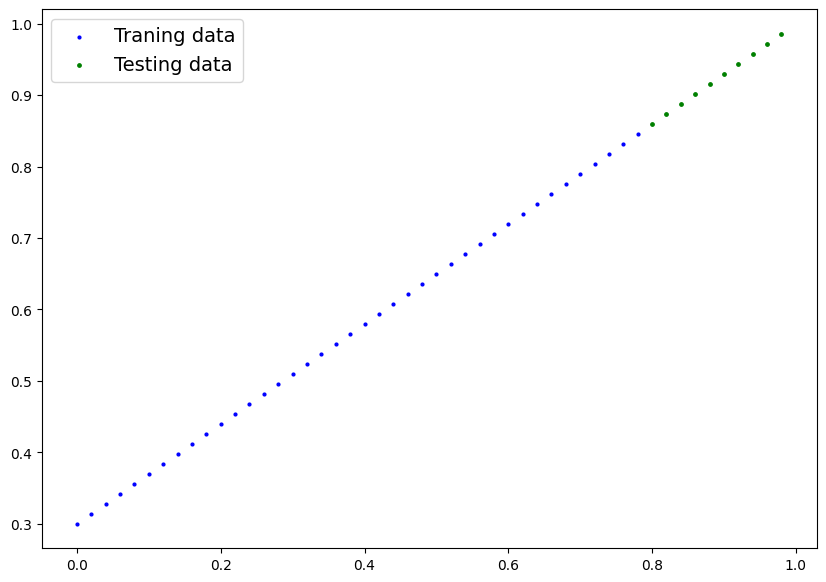

In [ ]:
plot_predictions()

## 2. Build model

Biuld our first model:

this is very exciting

In [ ]:
from torch import nn as nn

# Create a linear regrrision model

class LinearRegressionModel(nn.Module): # If i didn't write (nn.Module) this will become an normal class
  def __init__(self):                   # So the nn.Module is the head of the LinearRegression
    super().__init__()

    # Create a parameter for the weights
    # Q: What is parameter? A: the parameter is something that make the model give me better reasults

    # Example:

    # Normal tensor = just a number, stays the same
    # nn.Parameter = a number that PyTorch will automatically update during training
    self.weights = nn.Parameter(torch.randn(1,
                                            dtype = torch.float),
                                            requires_grad=True)

    # Now let's do the bias

    self.bias = nn.Parameter(torch.randn(1,
                                          dtype = torch.float),
                                          requires_grad=True)

    # Forward method to define the compution in the model

  def forward(self, x):
    return self.weights * x + self.bias # This is the linear reggression formula

# PyTorch Model Building Essentials

PyTorch has **four essential modules** you can use to create almost any kind of neural network:

1. `torch.nn`
2. `torch.optim`
3. `torch.utils.data.Dataset`
4. `torch.utils.data.DataLoader`

For now, we'll focus on the first two.

---

## Main PyTorch Modules

| Module | What does it do? |
|--------|------------------|
| `torch.nn` | Contains all of the building blocks for neural networks (layers, activation functions, etc.) |
| `torch.nn.Parameter` | Stores tensors that can be used with `nn.Module`. If `requires_grad=True`, gradients are calculated automatically (this is called "autograd") |
| `torch.nn.Module` | The base class for all neural network modules. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method |
| `torch.optim` | Contains optimization algorithms (these tell the model parameters how to change to improve and reduce loss) |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method. This defines the computation that will happen on the data |

---

## Simple Way to Think About It

Almost everything in a PyTorch neural network comes from `torch.nn`:

- **`nn.Module`** = Contains the larger building blocks (layers)
- **`nn.Parameter`** = Contains the smaller parameters like weights and biases
- **`forward()`** = Tells the blocks how to make calculations on inputs
- **`torch.optim`** = Contains methods on how to improve the parameters

---

**Remember:** Everything works together to build and train your model!

### Checking the contents of our pytorch model

Now we have created model, Let's see what is inside...

Soo we can check our model parameters or what inside our model using `.parameters()`

In [ ]:
# Create random seed
torch.manual_seed(42)

# Create an instance from the model (This is an subclass from nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters()) # We will get always the same number because we have set an random seed

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# We want to make it close as possible to:
weight, bias # We will see this in the future انشاء الله

(0.7, 0.3)

### Make some predictions using `torch.inference_mode()`

To check our model's Predictive power, let's see how well it's predict `y_test` based on `x_test`

When we pass data through our model, it's going to run it throught the `forward()` method

But how it's will try to predict test from another test?:

* 1. The model learned from `x_train` (The traning questions) and the `y_train` (The testing questions)

* 2. The model found the pattern: `y = weight * x + bias`

* 3. Now we give it `x_test` (New questions it never saw before)

* 4. The model uses the pattern it learned to predict `y_test` (answers for the new questions)

* 5. We compare the predictions with the real `y_test` too see if the model is accurate


In [ ]:
x_test, y_test # We will try our model (x_test) predict the same or close to (y_test)

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# Make predictions with model

with torch.inference_mode(): # This is saying to PyTorch stop all traning things and just make predictions, Because if we didn't disabled this will use more momory and will make it slower in our data it's not that dramictic but it's affect on the big data
  y_preds = model_0(x_test) # it's take the x_test and make on it the formula self.weights * x + self.bias

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

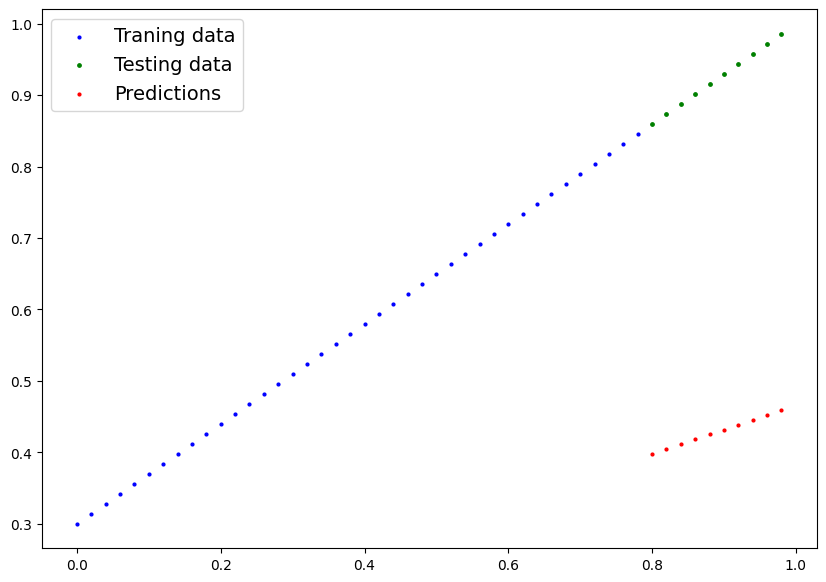

In [ ]:
plot_predictions(predictions=y_preds) # Let's view it

## 3. Train model

Soo the whole idea of traning to move some *Know parameters* to get the best weight and bias
And then get the best output after traning it

And now our model is very poor rebrisintation and we want to tell the model how poor is it soo we will use `Loss function`


**Loss Function:**
A function that mesaure how mutch your model wrong Lower is better

**Optimizer:** A function that is trying to optimize the weight and the bias to get the predicts

And spefically for PyTorch we need:

* Traning Loop
* Testing Loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss() # Why we didn't define the model name? we will define it later in the traning loop

# Setup the optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), # Parameters of target model to optmize, And the optim.SGD is telling the model how wrong he is
                            lr=0.001) # lr = learning rate = The most important hyberparameter you can set
                            # Ok how is the numbers in the lr work? if the weight is [0.3672]
                            # And our lr is 0.01 the thing that will be changed is the: [0.3672]
                            #                                                           [0.01] = 6
                            # ok what if the lr is 0.0001? and the bais is [0.3712]
                            #                                              [0.0001] = 2

## Building a traning loop (And a testing loop) in PyTorch

A couple of things we need to know:

0. Loop through the data and do:

1. Forward pass (this involves data to move through our model's `forward()` function ) to make predictions on data- also called as forward propagation
2. Calculate the Loss (compare forward pass predictions to the True answers)
3. Optimizer zero grad
4. Loss backward - Move backward through the network to calculate the gradients of each of the parameters of our model with respect the Loss
5. Optimizer step - Use the optimzer to to adjust our model optimizer to decrease the Loss

In [ ]:
# Seed the seed
# torch.manual_seed(42)

# An one epoch mean one loop around the data (This is hyperparameter because we set the data ourselvs)
epochs = 2000

# Track  diffrent values
epoch_count = []
loss_values = []
test_loss_values = []

### Traning
# 0. Loop through the data
for epoch in range(epochs): # Why we use range(epochs)? Because it's make it integer
  # Set the model to traning mode
  model_0.train() # train mode in PyTorch that sets all the steps, Or the main things

  # 1. Forward pass
  y_pred = model_0(x_train) # Take the x_train and make on it the forward pass and then put the result in the y_pred, Try to learn the patterns

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train) # In here we write the (input, target), y_train = answers of traning

  # 3. optimizer zero grad, Why do we need this? Because when we loop our data and we didn't zero our grad it's could lead to an paramter incorrect outputs, More information: https://medium.com/@lazyprogrammerofficial/in-pytorch-why-do-we-need-to-call-optimizer-zero-grad-8e19fdc1ad2f
  optimizer.zero_grad()

  # 4. perform backpropagation on the loss with respect to the parameter of the model,  the goal of backpropagation is to determine how model weights and biases should be adjusted to minimize error as measured by a "loss function".
  loss.backward()

  # 5. Setup the optimizer (Perefom the optimizer)
  optimizer.step() # Actually make the adjusment, The optimzer should come after the backpropagation


  ## Testing
  model_0.eval() # Turns off gradient settings, That we are not needing it in testing mode

  with torch.inference_mode(): # We can also see it as torch.no_grad, It's the same thing but the inference mode is more faster

    test_pred = model_0(x_test) # Make the test predictions

    test_loss = loss_fn(test_pred, y_test) # The input (test_pred), The target  (y_test)
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

  # Print out what is happening
  if epoch % 10 == 0: # Run for every 10 epochs
    print(f'Epoch: {epoch} / Loss {loss} / Test Loss: {test_loss}')
    print(model_0.state_dict())

Epoch: 0 / Loss 0.31288138031959534 / Test Loss: 0.4931890368461609
OrderedDict({'weights': tensor([0.3371]), 'bias': tensor([0.1298])})
Epoch: 10 / Loss 0.3013603389263153 / Test Loss: 0.4797181189060211
OrderedDict({'weights': tensor([0.3410]), 'bias': tensor([0.1398])})
Epoch: 20 / Loss 0.28983938694000244 / Test Loss: 0.4662471413612366
OrderedDict({'weights': tensor([0.3449]), 'bias': tensor([0.1498])})
Epoch: 30 / Loss 0.2783183455467224 / Test Loss: 0.4527761936187744
OrderedDict({'weights': tensor([0.3488]), 'bias': tensor([0.1598])})
Epoch: 40 / Loss 0.26679736375808716 / Test Loss: 0.43930521607398987
OrderedDict({'weights': tensor([0.3527]), 'bias': tensor([0.1698])})
Epoch: 50 / Loss 0.2552763819694519 / Test Loss: 0.4258342385292053
OrderedDict({'weights': tensor([0.3566]), 'bias': tensor([0.1798])})
Epoch: 60 / Loss 0.24375538527965546 / Test Loss: 0.41236335039138794
OrderedDict({'weights': tensor([0.3605]), 'bias': tensor([0.1898])})
Epoch: 70 / Loss 0.232234388589859 /

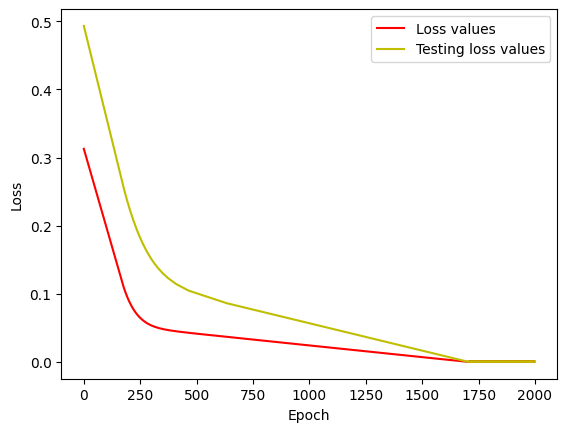

In [ ]:
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), c='r', label='Loss values')
plt.plot(epoch_count, test_loss_values, c='y', label='Testing loss values')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

## Saving a model in PyTorch

There are three things we should know to save and load an PyTorch model:

1. `torch.save()` - Allow you to save a PyTorch object in python pickle format

2. `torch.load()` - Allow you to load an saved PyTorch object

3. `torch.nn.Module.load_state_dict()` - This allows you to load a saved state dictaniory

For learning more: https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# Saving our PyTorch model
from pathlib import Path # This is Python library that is for saving the path's

# 1. Create model directory

MODEL_PATH =  Path('models') # We will just call it models
MODEL_PATH.mkdir(parents=True, exist_ok=True) # This line will create a folder(directory) if it dose not already exists, mkdir = Make a directory, parents = True, this is mean create all missign parents model, exist_ok=True This is mean if the model is already exists it's ok don't throw any error

# 2. Create model save path

MODEL_NAME = '01_Pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict

print(f'Saving model: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH) # f = file path

Saving model: models/01_Pytorch_workflow_model_0.pth


In [ ]:
# Loading a PyTorch model

model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [ ]:
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (This will update the new instance with our new parameters)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict() # WOW look here we get the same weight and bias (Parameters)

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_0_preds = loaded_model_0(x_test)

loaded_model_0_preds

NameError: name 'loaded_model_0' is not defined

In [ ]:
# Compare loaded model preds with original model preds

y_preds == loaded_model_0_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
# We got all False let's debug it



y_preds = model_0(x_test)

y_preds

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]], grad_fn=<AddBackward0>)

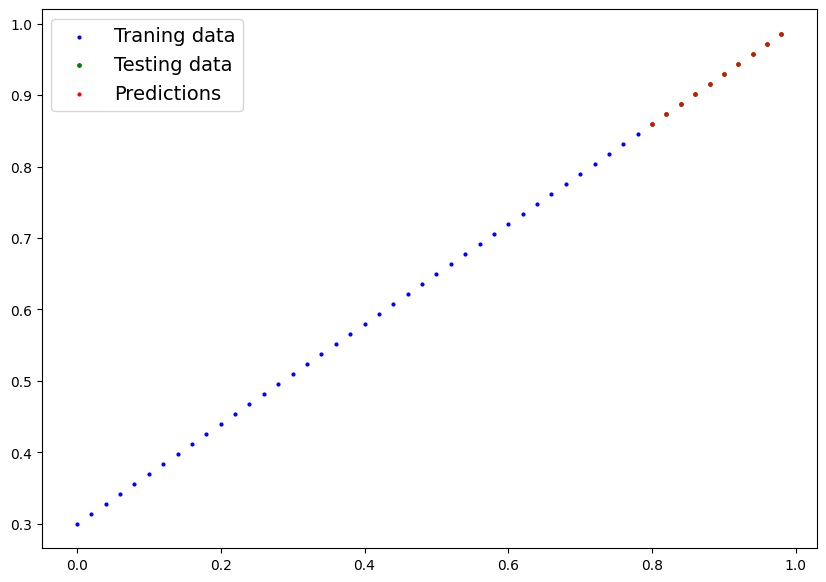

In [ ]:
plot_predictions(predictions=loaded_model_0_preds)

## 6. Putting it all toghether

### 6.1 Data

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

Make a device agnostic code if GPU is avaliable it will use if not it will use CPU

In [ ]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

print(f'We are using this device: {device}')

We are using this device: cuda


In [ ]:
weight = 0.7
bias = 0.3

x = torch.arange(0, 1, 0.02).unsqueeze(1)
y = weight * x + bias

In [ ]:
split_data = int(0.8 * len(x))

x_train, y_train = x[:split_data], y[:split_data]
x_test, y_test = x[split_data:], y[split_data:]

In [ ]:
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_questions=x_train,
                     train_labels=y_train,
                     test_questions=x_test,
                     test_labels=y_test,
                     predictions=None):

  plt.scatter(train_questions, train_labels, c='g', s=4, label='Traning questions')

  plt.scatter(test_questions, test_labels, c='r', s=4, label='Testing questions' )

  if predictions is not None:
    plt.scatter(test_questions, predictions, c='y', s=4, label='Predictions')

  plt.legend()

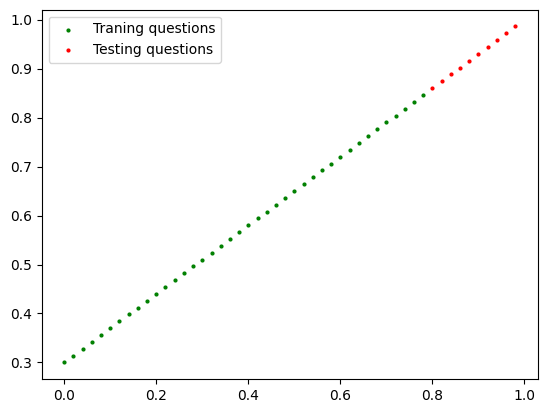

In [ ]:
plot_predictions()

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x):
    return self.linear_layer(x)

In [ ]:
model_1 = LinearRegression().to(device)

model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.4106]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0162], device='cuda:0'))])

In [ ]:
loss_fn = torch.nn.L1Loss()

optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.01)

In [ ]:
epochs = 2000

loss_graph = []
epoch_graph = []

# Put data on the target device

x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_preds = model_1(x_train)

  loss = loss_fn(y_preds, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    y_test_preds = model_1(x_test)

    test_loss = loss_fn(y_test_preds,  y_test)
    y_test_preds = y_test_preds.to(device)

    loss_graph.append(loss)
    epoch_graph.append(epoch)

    if epoch % 10 == 0:
      print(f'epoch: {epoch} / Loss: {loss} / test loss: {test_loss}')

epoch: 0 / Loss: 0.7168943285942078 / test loss: 1.2587124109268188
epoch: 10 / Loss: 0.6016843318939209 / test loss: 1.124002456665039
epoch: 20 / Loss: 0.48647433519363403 / test loss: 0.9892924427986145
epoch: 30 / Loss: 0.37255096435546875 / test loss: 0.8555826544761658
epoch: 40 / Loss: 0.2886775732040405 / test loss: 0.7404155135154724
epoch: 50 / Loss: 0.23591065406799316 / test loss: 0.6465551257133484
epoch: 60 / Loss: 0.20314979553222656 / test loss: 0.5717667937278748
epoch: 70 / Loss: 0.1829652637243271 / test loss: 0.5133174657821655
epoch: 80 / Loss: 0.17024891078472137 / test loss: 0.46675369143486023
epoch: 90 / Loss: 0.16206799447536469 / test loss: 0.43175289034843445
epoch: 100 / Loss: 0.15612481534481049 / test loss: 0.40396079421043396
epoch: 110 / Loss: 0.1513456553220749 / test loss: 0.3814769387245178
epoch: 120 / Loss: 0.1473456472158432 / test loss: 0.36367693543434143
epoch: 130 / Loss: 0.14356665313243866 / test loss: 0.34926706552505493
epoch: 140 / Loss: 

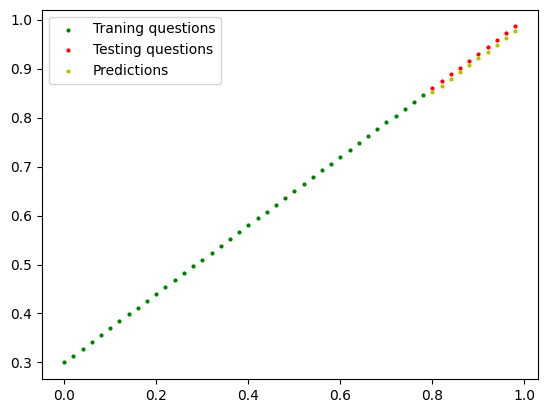

In [ ]:
plot_predictions(predictions=y_predictions.cpu())